In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def _delta(y, ypred):
    return ypred - y

def _cost(y, ypred):
    cost = np.sum(_delta(y, ypred) ** 2) / (2 * len(y))
    return cost

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

def normalise(x):
    return ((x-x.mean()) / x.std())

def denormalise(xnew, xold):
    return ((xnew * xold.std()) + xold.mean())


In [3]:
X, Y = make_regression(n_samples=100, n_features=5, noise=10, 
random_state=42)
Y = Y.reshape(-1,1)
x = normalise(X)
y = normalise(Y)

### Forward propogation

In [4]:
input_size = x.shape[1]
hidden_size = 20
output_size = y.shape[1]
w1 = np.random.rand(input_size, hidden_size)
w2 = np.random.rand(hidden_size, output_size)
learning_rate = 1E-4
epochs = 100000

w2.shape, w1.shape

((20, 1), (5, 20))

In [5]:
w1[:1]

array([[0.34314873, 0.67340431, 0.09746667, 0.05159185, 0.89730889,
        0.70229314, 0.37964649, 0.68535546, 0.8285661 , 0.04666342,
        0.30042399, 0.18659624, 0.48170483, 0.50198115, 0.80681232,
        0.31407004, 0.99389444, 0.05723255, 0.69103018, 0.52117541]])

In [6]:
w2[:5]

array([[0.88735151],
       [0.28079459],
       [0.46917083],
       [0.99922186],
       [0.38162643]])

In [7]:
z1 = np.dot(x, w1)
a1 = sigmoid(z1)
output = np.dot(a1, w2) #applying sigmoid here would give output b/w [0,1]
cost = _cost(y, output)

### Question 1: Backpropogation from output to hidden layer.

In [8]:
delta2 = output - y
dE_dw2 = np.dot(a1.T, delta2)
w2 -= learning_rate * dE_dw2

In [9]:
w2.shape

(20, 1)

In [10]:
w2[:5]

array([[0.85703973],
       [0.24986749],
       [0.43692747],
       [0.96675943],
       [0.34928249]])

### Question 2: Backpropogation from hidden to input layer.

In [11]:
delta1 = sigmoid_prime(z1)*np.sum(delta2*w2.T)
dE_dw1 = (delta1.T.dot(x)).T
w1 -= learning_rate * dE_dw1

In [12]:
w1.shape

(5, 20)

In [13]:
w1[:1]

array([[1.27890064, 1.64369261, 0.69331513, 0.77550589, 1.80679916,
        1.56477039, 1.15278592, 1.77970138, 2.27785984, 0.24424917,
        0.99483406, 0.74799567, 1.12597352, 1.68852044, 1.69042614,
        1.0264415 , 2.05131158, 0.42351723, 1.38424302, 1.84887983]])

### Question 3: For loop of forward and backward pass.

Loss: 0.0050 at epoch: 22496


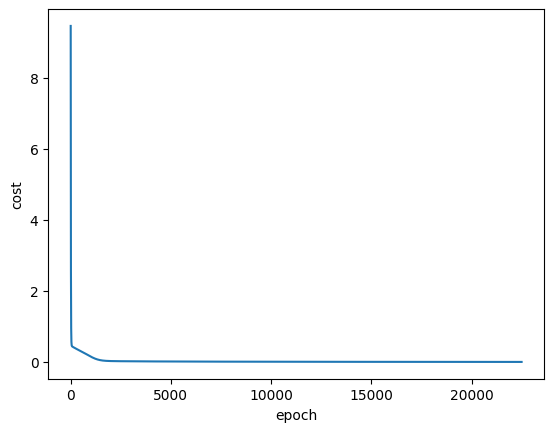

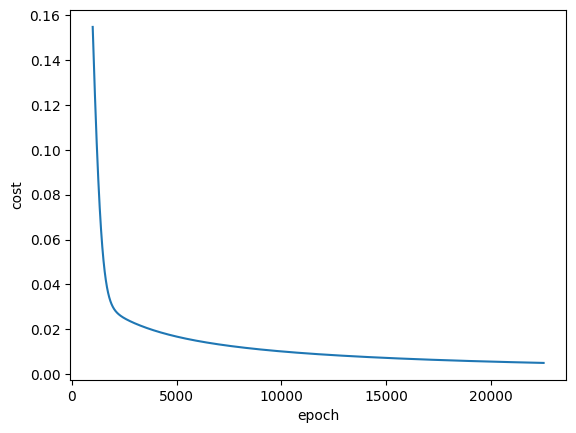

In [14]:
epoch_list =[]
cost_list =[]
y_preds =[]
X, Y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)
Y = Y.reshape(-1,1)
x = normalise(X)
y = normalise(Y)
input_size = x.shape[1]
hidden_size = 20
output_size = y.shape[1]
w1 = np.random.rand(input_size, hidden_size)
w2 = np.random.rand(hidden_size, output_size)
learning_rate = 0.0001
epochs = 10000000

for epoch in range(epochs):
    
    #forward
    z1 = np.dot(x, w1)
    a1 = sigmoid(z1)
    output = np.dot(a1, w2) 
    cost = _cost(y, output)

    #back1
    delta2 = output - y
    dE_dw2 = np.dot(a1.T, delta2)
    w2 -= learning_rate * dE_dw2

    #back2
    delta1 = sigmoid_prime(z1)*(delta2*w2.T)
    dE_dw1 = (delta1.T.dot(x)).T
    w1 = w1 - learning_rate * dE_dw1

    if cost > 5E-3:
        epoch_list.append(epoch)
        cost_list.append(cost)
    if cost <= 5E-3:        
        epoch_list.append(epoch)
        cost_list.append(cost)
        y_preds.append(denormalise(output, Y))
        break

print(f'Loss: {cost_list[-1]:.4f} at epoch: {epoch_list[-1]}')
plt.plot(epoch_list, cost_list)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()
plt.plot(epoch_list[1000:], cost_list[1000:])
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

First graph has costs starting from epoch 1 and appears like that as weights are randomly initialised and first few outputs have very high cost.

### Question 4: Scikit learn to predict 

In [15]:
X, Y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)
nn = MLPRegressor(activation='logistic', max_iter=100000)
nn.fit(X,Y)
Y_pred = nn.predict(X)
np.sqrt(mean_squared_error(Y,Y_pred))

0.23771133484457901

In [16]:
Y_pred

array([ -72.82312798,  -56.76779717, -264.38064313,  118.55526108,
       -120.18630303, -149.97922057,  112.40750951,   40.170837  ,
       -141.95847717,  -73.67937226,   10.31768894, -343.35899732,
        -69.2980293 , -118.79553597,    2.13591554,  126.82558611,
          0.82224154, -261.29263972,   46.55157641,  -25.51974178,
         77.69564348,   28.45014835,  -28.26127525,  150.83140574,
        167.09321426,  295.65262325,   13.74474121,  153.25467961,
       -198.5476872 ,  308.40454547, -118.61749868,   31.0681712 ,
         -3.71942284,   41.01899396,  168.78004278,  -65.8605256 ,
        124.16000784,  -36.02879006,  127.84471308,   55.15785283,
       -147.6335611 ,   12.43820593,    3.60238993,   86.50721693,
        409.19657563,  180.25392329,  348.45903709,  -50.80581638,
        -57.84271476,  189.74240933,   16.70897193, -101.1910935 ,
         -2.45401802, -298.22153939, -270.6587488 , -225.86441541,
         47.46447345,   98.26681196, -131.87960103,   68.44375

In [17]:
Y

array([ -72.84025434,  -56.76950471, -264.33077026,  118.55916727,
       -120.19600589, -149.98103668,  112.42727709,   40.1701236 ,
       -141.96820478,  -73.67585194,   10.33407479, -345.71988595,
        -69.26637873, -118.78707947,    2.15209112,  126.82714045,
          0.91458995, -261.27203996,   46.56292086,  -25.52378711,
         77.68993478,   28.4610334 ,  -28.25812943,  150.84037433,
        167.08996381,  295.6546016 ,   13.73039315,  153.25504284,
       -198.51048771,  308.4024102 , -118.62218893,   31.02504019,
         -3.7183791 ,   41.02054897,  168.77726012,  -65.85188352,
        124.15090375,  -35.99993997,  127.85512023,   55.15041248,
       -147.6368684 ,   12.45236531,    3.57518675,   86.51045456,
        409.19935965,  180.251948  ,  348.46107807,  -50.80554605,
        -57.83463804,  189.74648505,   16.70388767, -101.20010675,
         -2.46268941, -298.23221487, -270.68329157, -225.81587435,
         47.46176791,   98.27210498, -131.89441301,   68.44456